In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_excel('animals-weight.xlsx')

In [22]:
data.head()

,Animals,Body Weight,Brain Weight
0,Mountain beaver,1.35,8.1
1,Cow,465000.00,423.0
2,Grey wolf,36330.00,119.5
3,Goat,27660.00,115.0
4,Roe deer,14830.00,98.2


## Visualização dos dados

In [23]:
data.corr()

,Body Weight,Brain Weight
Body Weight,1.00000,0.93409
Brain Weight,0.93409,1.00000


Text(0,0.5,'Brain Weight')

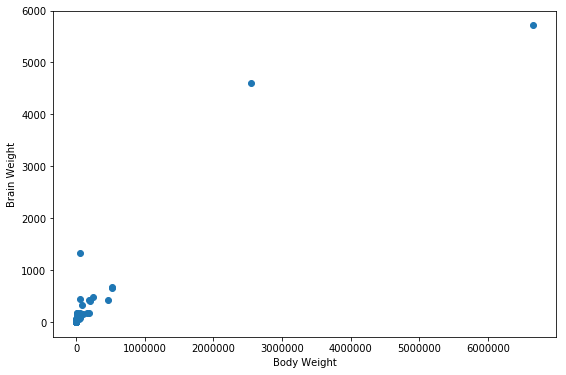

In [42]:
figure = plt.figure(figsize=(9,6))
plt.scatter(data['Body Weight'], data['Brain Weight'])
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

Utilizando a transformação logarítmica.

Text(0,0.5,'Brain Weight')

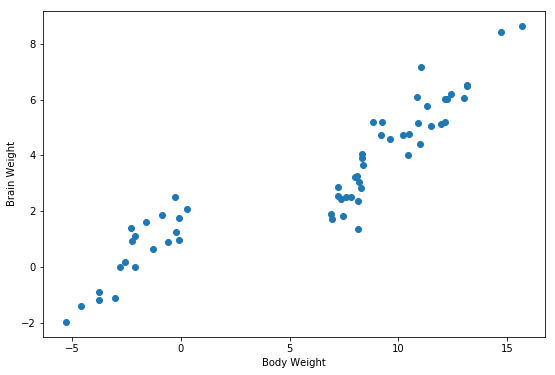

In [43]:
figure = plt.figure(figsize=(9,6))
#brain = data["Brain Weight"].apply(np.log)
#body = data["Body Weight"].apply(np.log)
plt.scatter(np.log(data['Body Weight']), np.log(data['Brain Weight']))
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

## Preparação dos Dados

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [112]:
data_scaled = scaler.fit_transform(data.drop('Animals', axis=1))

In [113]:
col = ['Body Weight', 'Brain Weight']
new_data = pd.DataFrame(data_scaled, columns=col)

In [50]:
new_data.head()

,Body Weight,Brain Weight
0,-0.226553,-0.302590
1,0.286742,0.140292
2,-0.186451,-0.183677
3,-0.196022,-0.188481
4,-0.210184,-0.206414


## Regressão Linear do zero

In [114]:
feature = new_data['Body Weight'].values

y = new_data['Brain Weight'].values

learning_rate = 0.1
interations = 1000
m = len(y)

x0 = np.ones(m)
X = np.c_[x0, feature]

In [115]:
theta = np.array([0,0])

In [56]:
for interation in range(interations):
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    theta = theta - learning_rate * gradients

In [57]:
theta

array([-6.51330841e-17,  9.34090404e-01])

In [99]:
col_coefs = ['Intercept', 'Body Weight']
coeff_df = pd.DataFrame(theta, col_coefs ,columns=['Coefficient'])
coeff_df

,Coefficient
Intercept,-6.513308e-17
Body Weight,9.340904e-01


## Regressão Linear com sklearn

In [89]:
from sklearn.linear_model import LinearRegression

X = feature.reshape((m,1))

ln = LinearRegression()

In [90]:
ln.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
y_pred = ln.predict(X)

In [93]:
ln.coef_

array([0.9340904])

In [94]:
ln.intercept_

-6.952140275861895e-17

In [101]:
theta_lin = [ln.intercept_, ln.coef_]
coeff_df = pd.DataFrame(theta_lin, col_coefs ,columns=['Coefficient'])
coeff_df

,Coefficient
Intercept,-6.95214e-17
Body Weight,[0.9340904041475165]


## MSE

In [95]:
from sklearn.metrics import mean_squared_error

rmse_zero = np.sqrt(mean_squared_error(y, y_scrach))
rmse = np.sqrt(mean_squared_error(y, y_pred))

print('Regressão Linear do zero: ', rmse_zero)
print('Regressão Linear usando sklearn: ', rmse)

Regressão Linear do zero:  0.35703657638893205
Regressão Linear usando sklearn:  0.35703657638893205


In [96]:
rmse_zero == rmse

True

In [360]:
theta_path_bgd = []
X_new = np.array([[-7], [20]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X)
    
    plt.scatter(np.log(data['Body Weight']), np.log(data['Brain Weight']))
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("X", fontsize=18)
    plt.axis([-7, 20, -3, 10])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

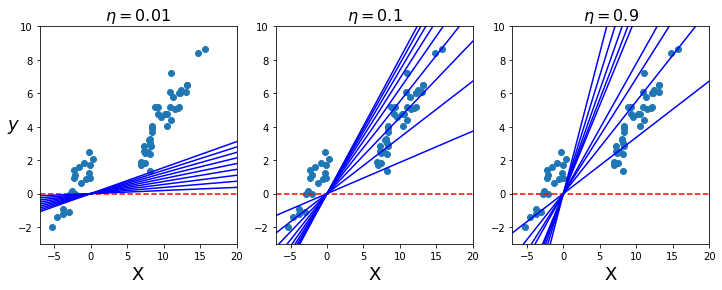

In [361]:
plt.figure(figsize=(12,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.01)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.9)